In [106]:
library("ggplot2")

## es1

In [107]:
triang <- function(x,a,b,c) {
    if(a>b){return("Not valid input")}
    ifelse(x>=a & x < c, 
        2*(x-a)/( (b-a)*(c-a) ),
        ifelse(x>=c & x<=b,
        2*(b-x)/( (b-a)*(b-c)  ), 
        0)
    )
}

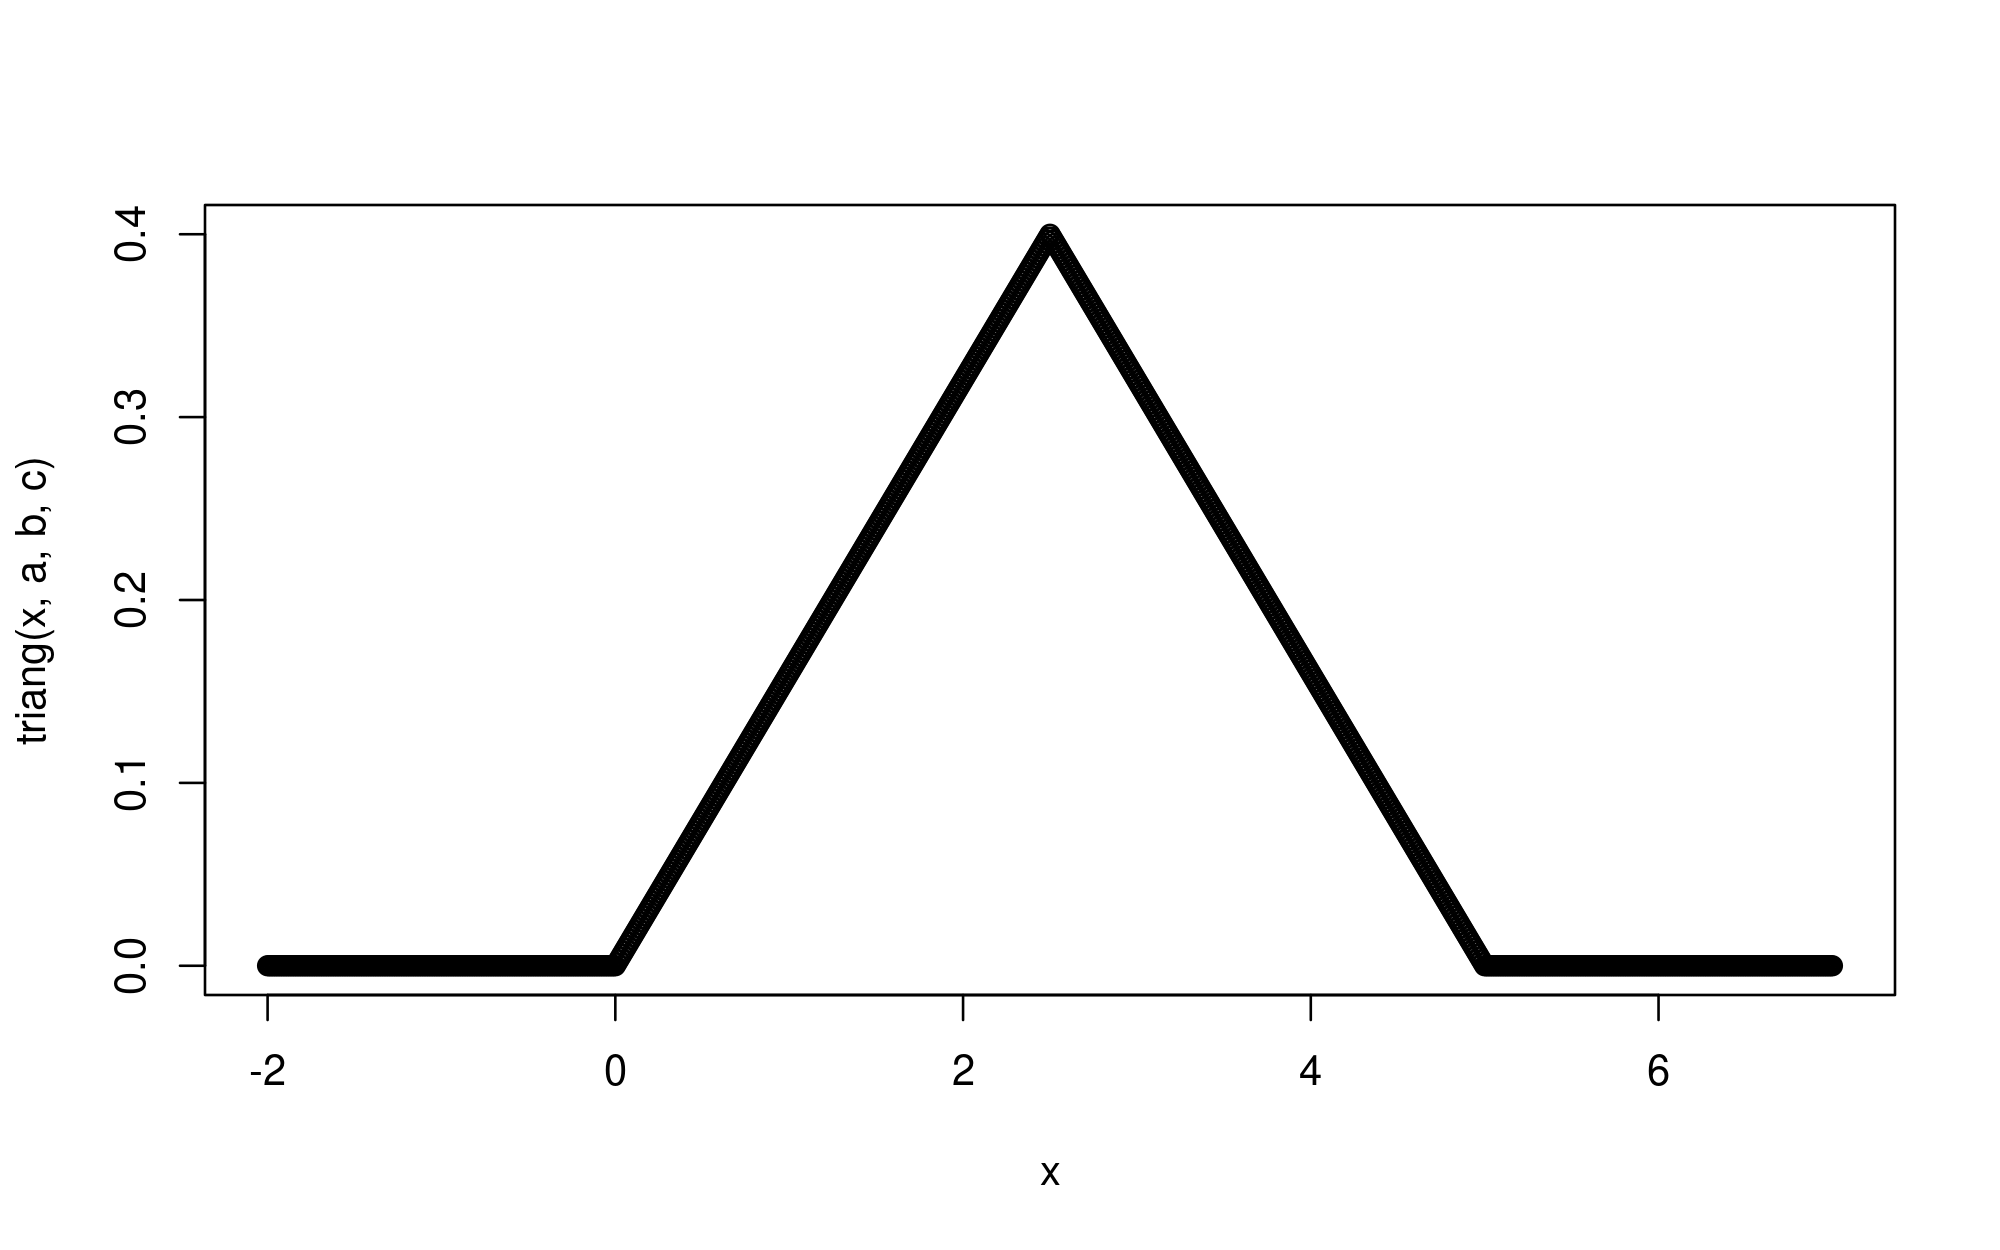

In [131]:
a <- 0
b <- 5
c <- (a+b)/2
x <- seq(a-2, b+2, 0.01)
plot(x, triang(x,a,b,c))

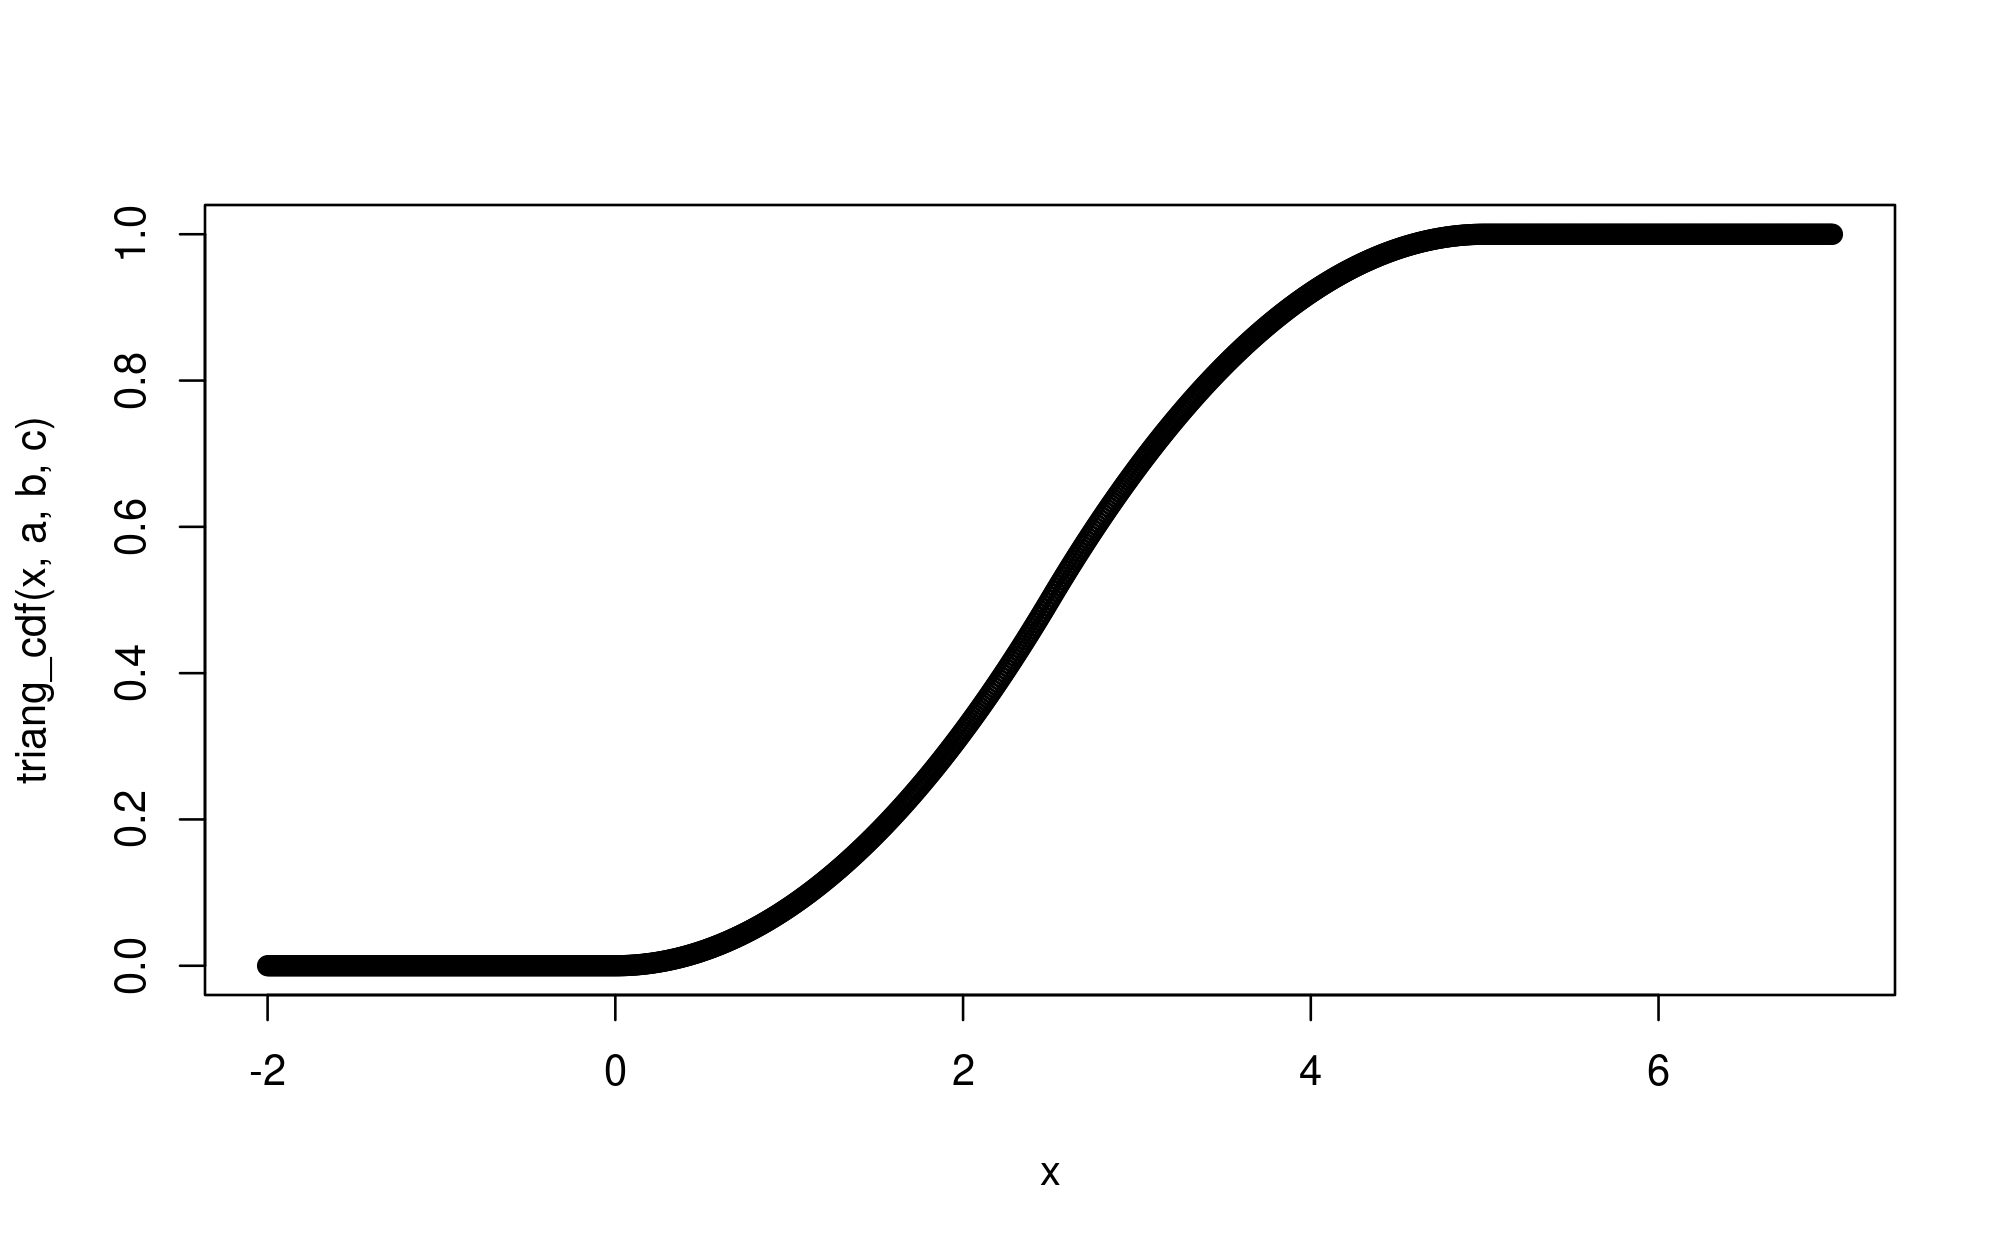

In [132]:
#how to generate random numbers from a continuous distribution
N <- 100
#integrating by hand the triangular pdf
triang_cdf <- function(x,a,b,c){
    if(a>b){return("Not valid input")}
    A <- 2/((b-a)*(c-a)) 
    B <- 2/((b-a)*(b-c))
    ifelse(x<a, 0,
        ifelse(x>=a & x < c,
        (0.5* x^2 - a*x + 0.5* a^2) * A,
        ifelse(x>=c & x<=b,
        (b*x - 0.5*x^2 -b*c + 0.5*c^2) * B + (0.5* c^2 - a*c + 0.5* a^2) * A, 
        #this traslational term is due to the fact that we have to add the left area of the triangle
        1)
    ) )
}


plot(x, triang_cdf(x,a,b,c))


The function is invertible only in the interval [a,b] obviously

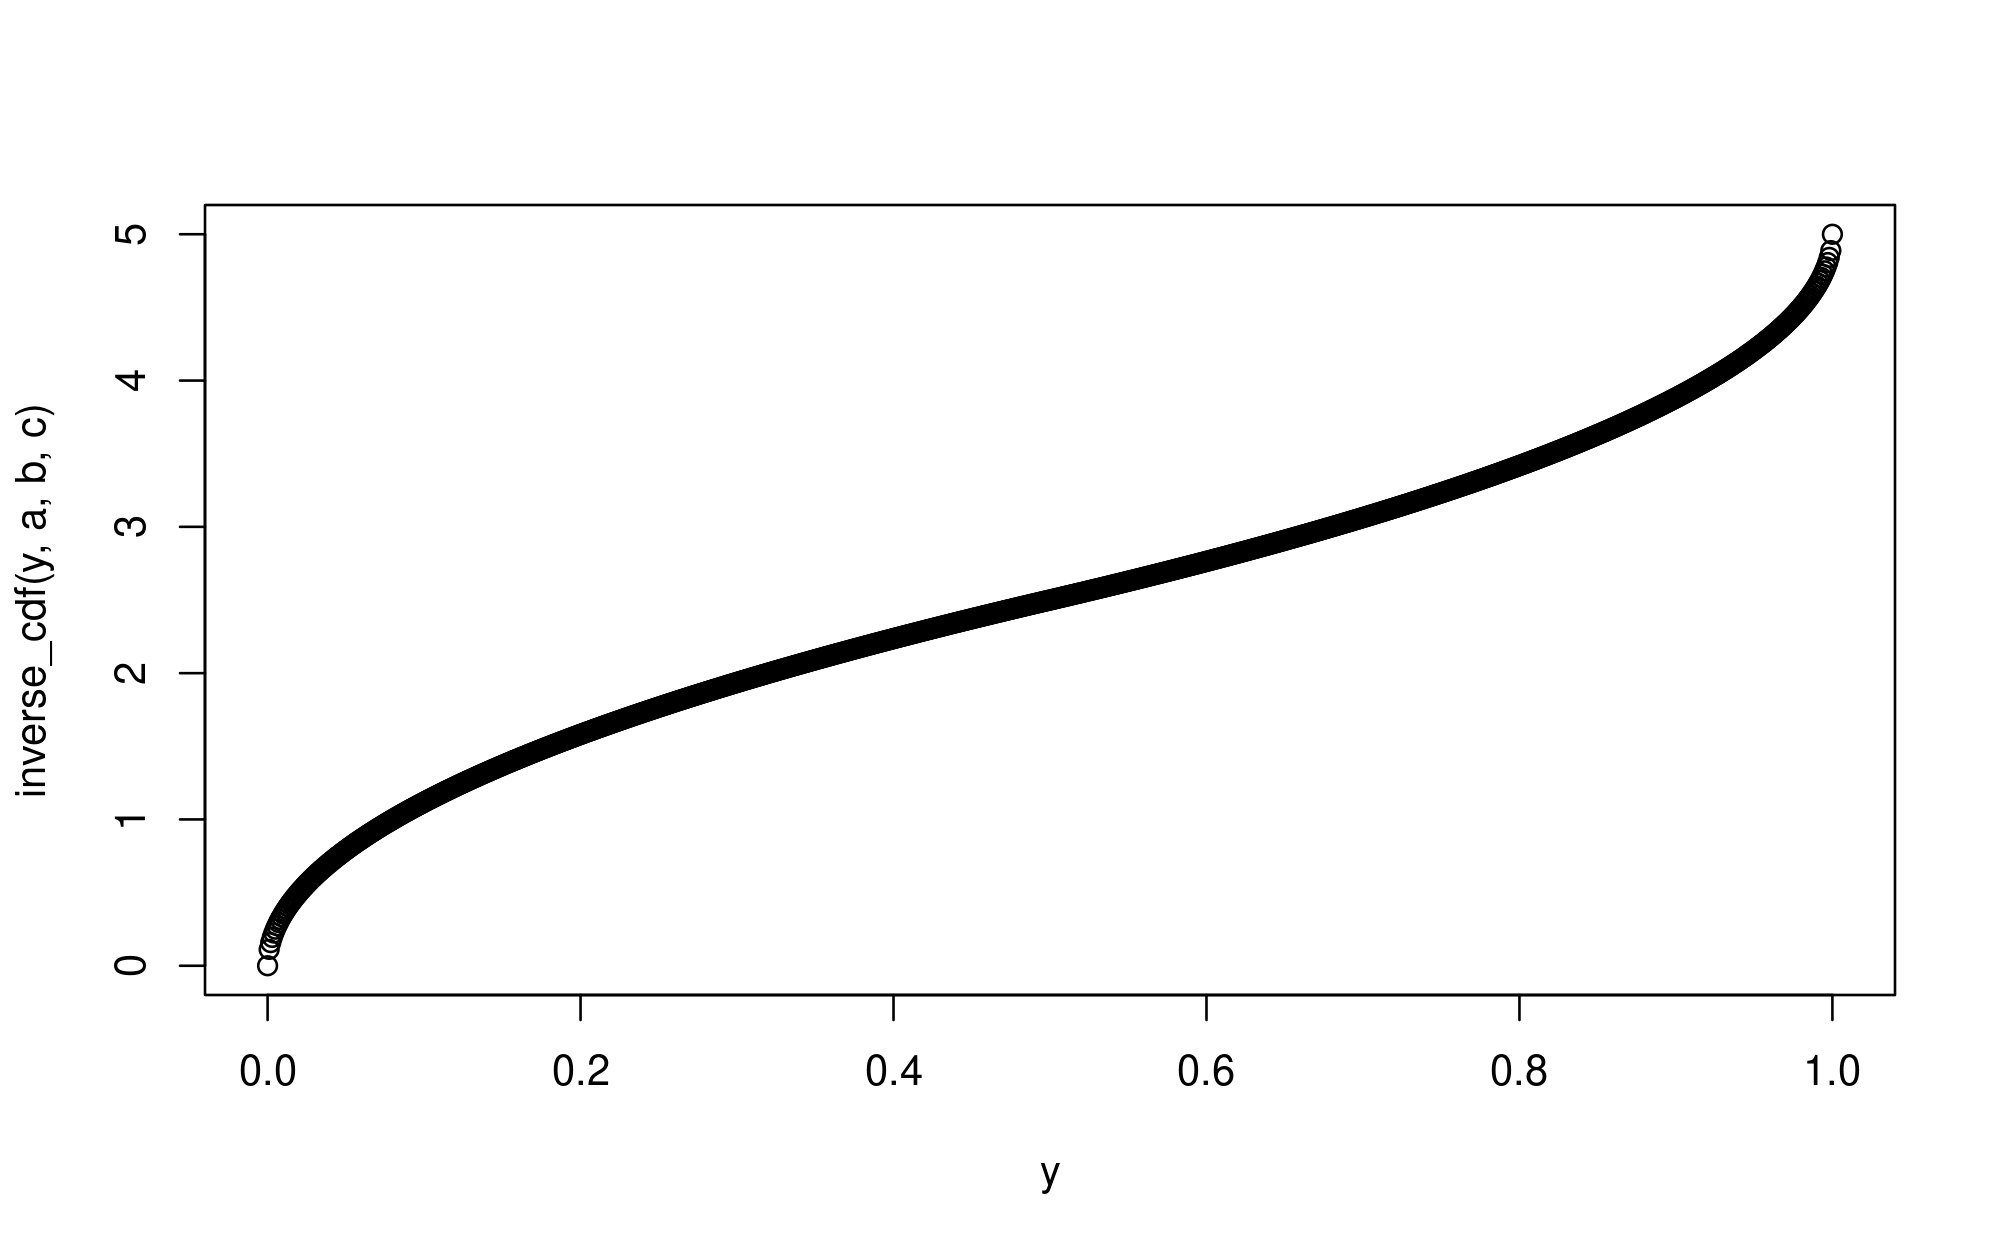

In [130]:
cdf_a <- triang_cdf(a,a,b,c)
cdf_c <- triang_cdf(c,a,b,c)
cdf_b <- triang_cdf(b,a,b,c)

inverse_cdf <- function(y, a,b,c){
    # if(y<0 & y>1){return("not valid input")}
    A <- 2/((b-a)*(c-a)) 
    B <- 2/((b-a)*(b-c))
    C <- A/2 * (c-a)^2  #F(c)
    ifelse(y>=cdf_a & y<cdf_c, a + sqrt(2*y/A), 
    ifelse(y>= cdf_c & y<=cdf_b, b - sqrt( (b-c)^2 - 2/B * (y-C) ), "invalid input" ) ) 
}

y<- seq(0,1,0.001)
plot(y, inverse_cdf(y,a,b,c))

In [111]:
# 1) extract a sample from U (0, 1)
samples <- runif(N)
# 2) compute F−1(u) = x

# 3) release x as sampled from our F(x)


## es2


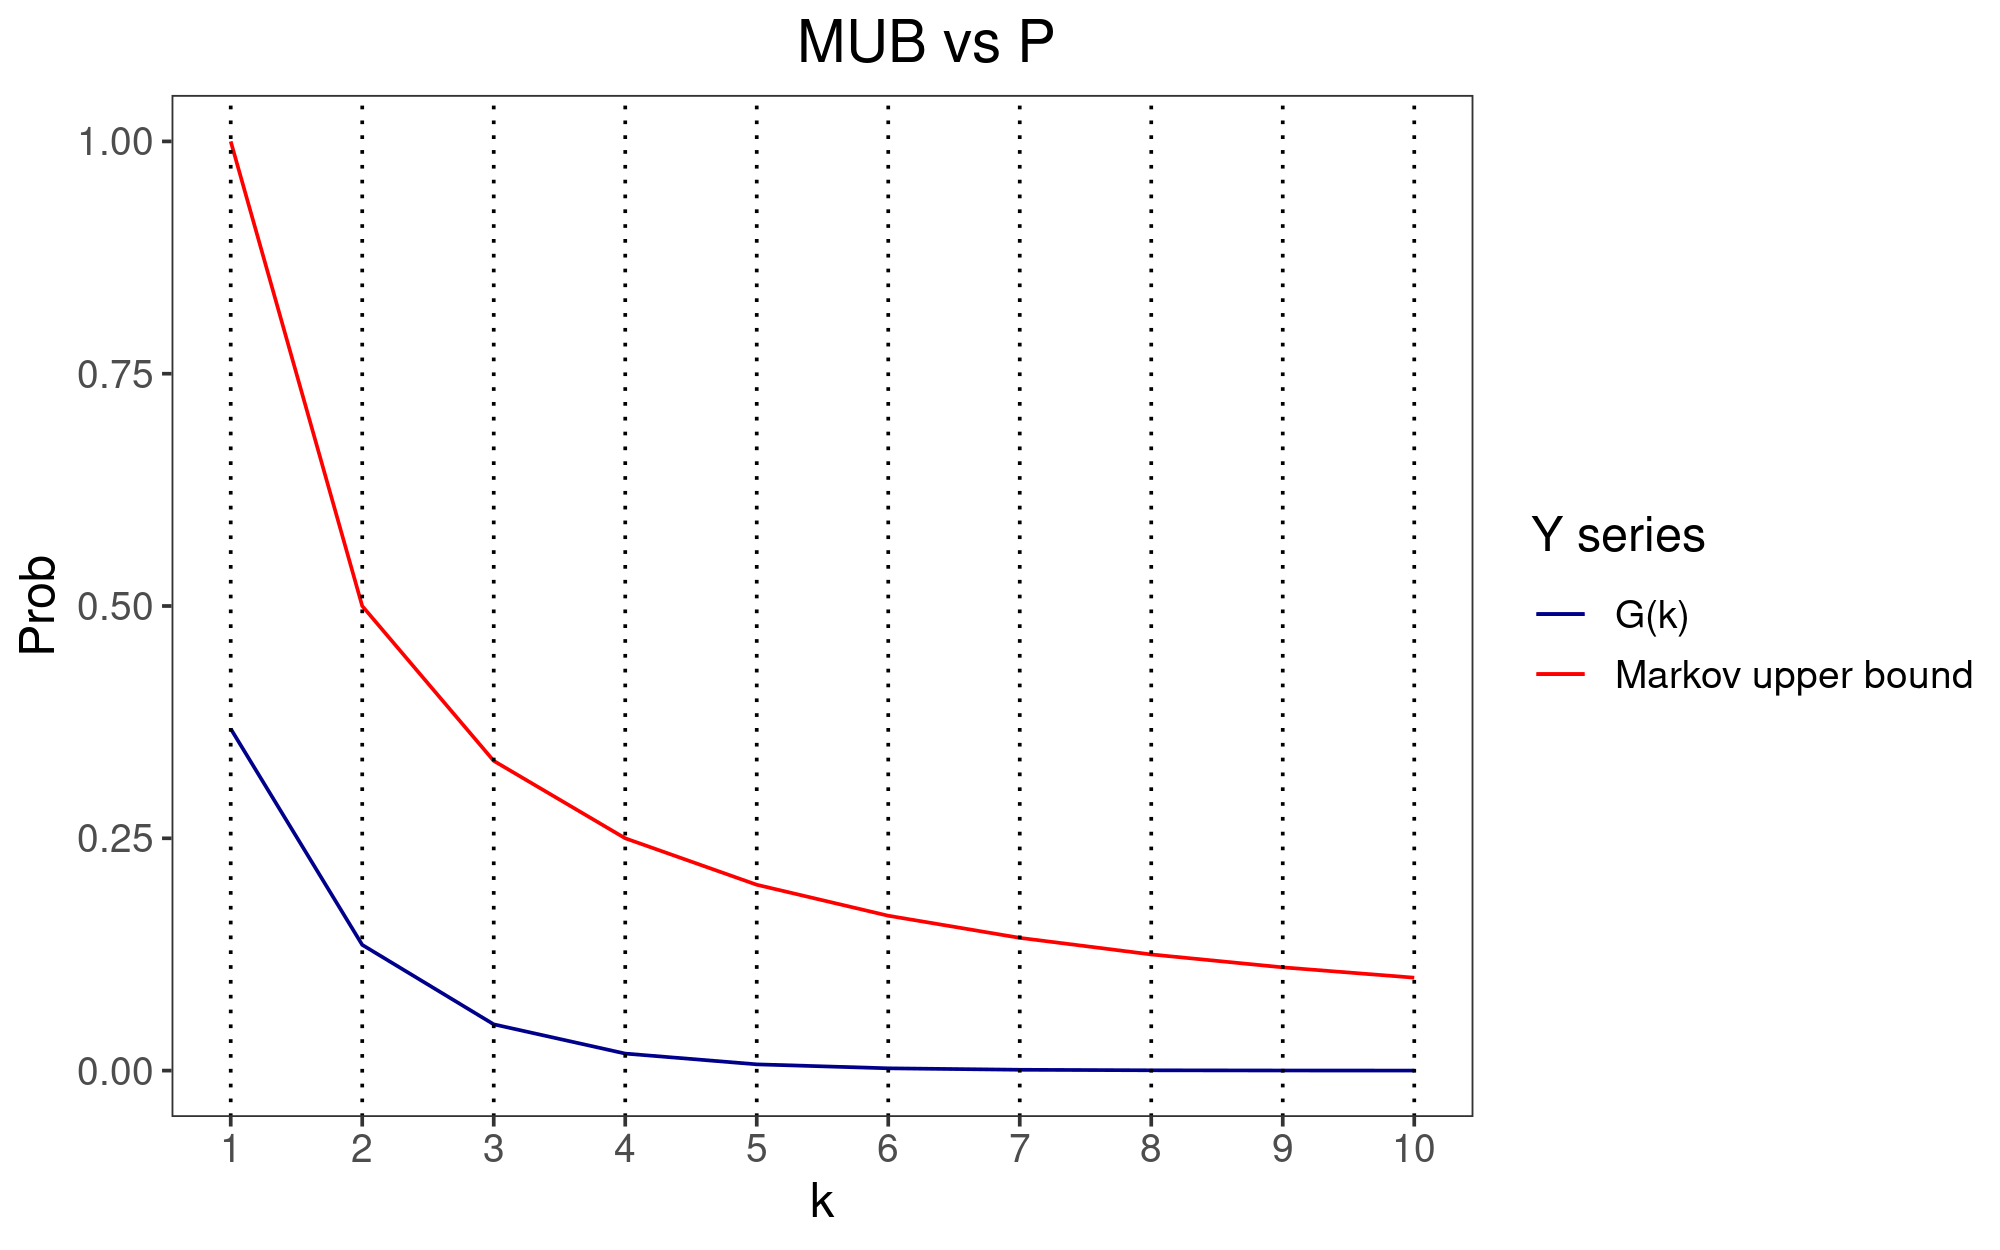

In [141]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)

# a) exponential
Mub <- function(E,k){
    return(E/k)
}

k <- 1:10

# x <- seq(0,10,0.1)
x <- 1:10
lambda <- 1
esp <- pexp(x, lambda) #F(x)
#recall that P(x>=k) = 1 - P(x<k)
E_esp <- 1/lambda
Mub_esp <- Mub(E_esp, x)
espl_plot <- ggplot()+
    geom_line(aes(x=x, y=1-esp, color="G(k)")) + 
    geom_line(aes(x=x, y=Mub_esp, color="Markov upper bound")) +
    scale_color_manual(name = "Y series", values = c("G(k)" = "darkblue", "Markov upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=x, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(x), breaks = x)


espl_plot

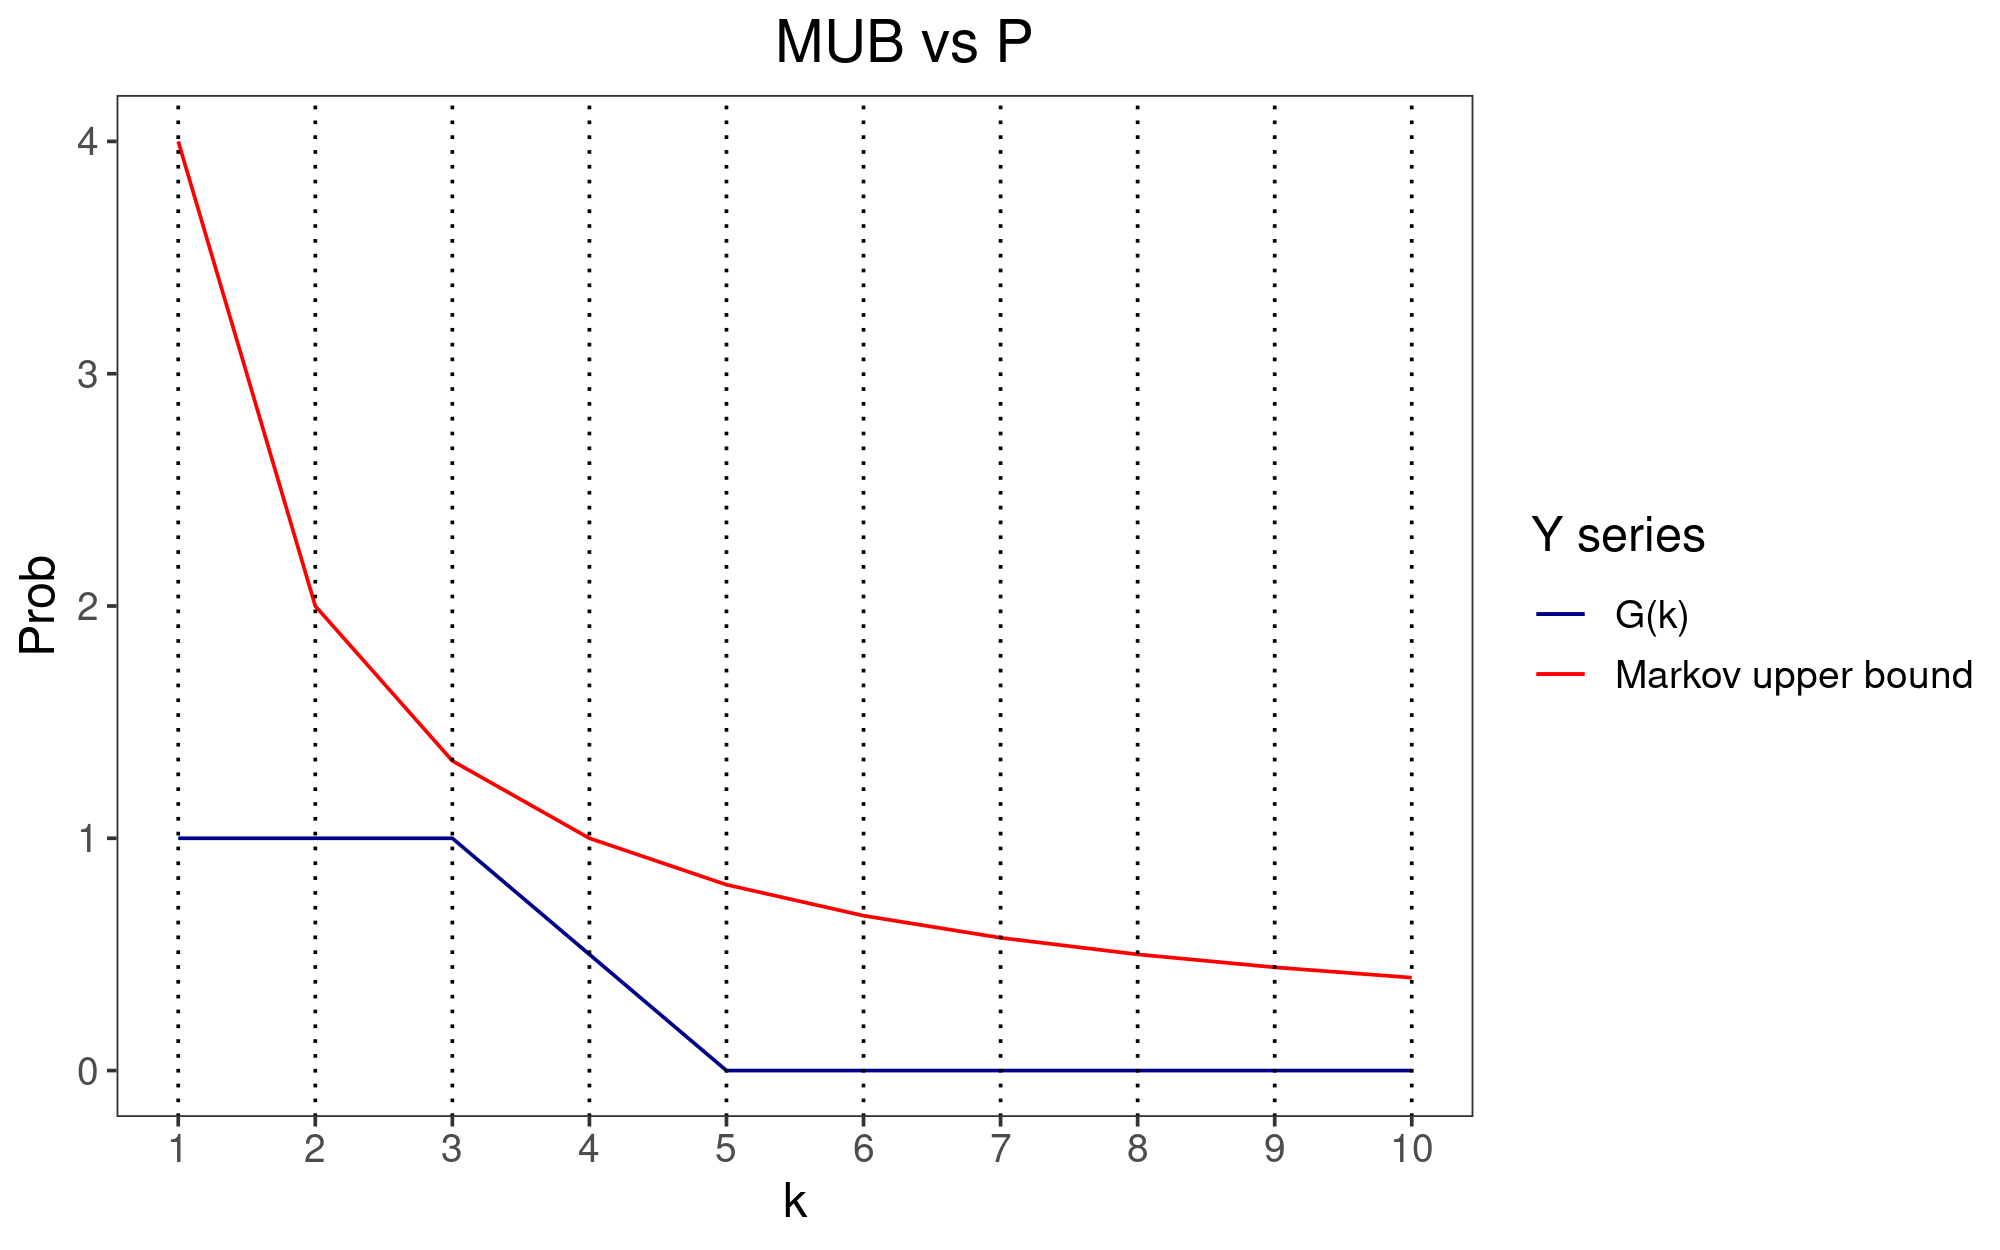

In [113]:
unif <- punif(x, min=3, max=5) #F(x)
E_unif <- (3+5)/2
Mub_unif <- Mub(E_unif, x)
unifl_plot <- ggplot()+
    geom_line(aes(x=x, y=1-unif, color="G(k)")) + 
    geom_line(aes(x=x, y=Mub_unif, color="Markov upper bound")) +
    scale_color_manual(name = "Y series", values = c("G(k)" = "darkblue", "Markov upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=x, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(x), breaks = x)
unifl_plot

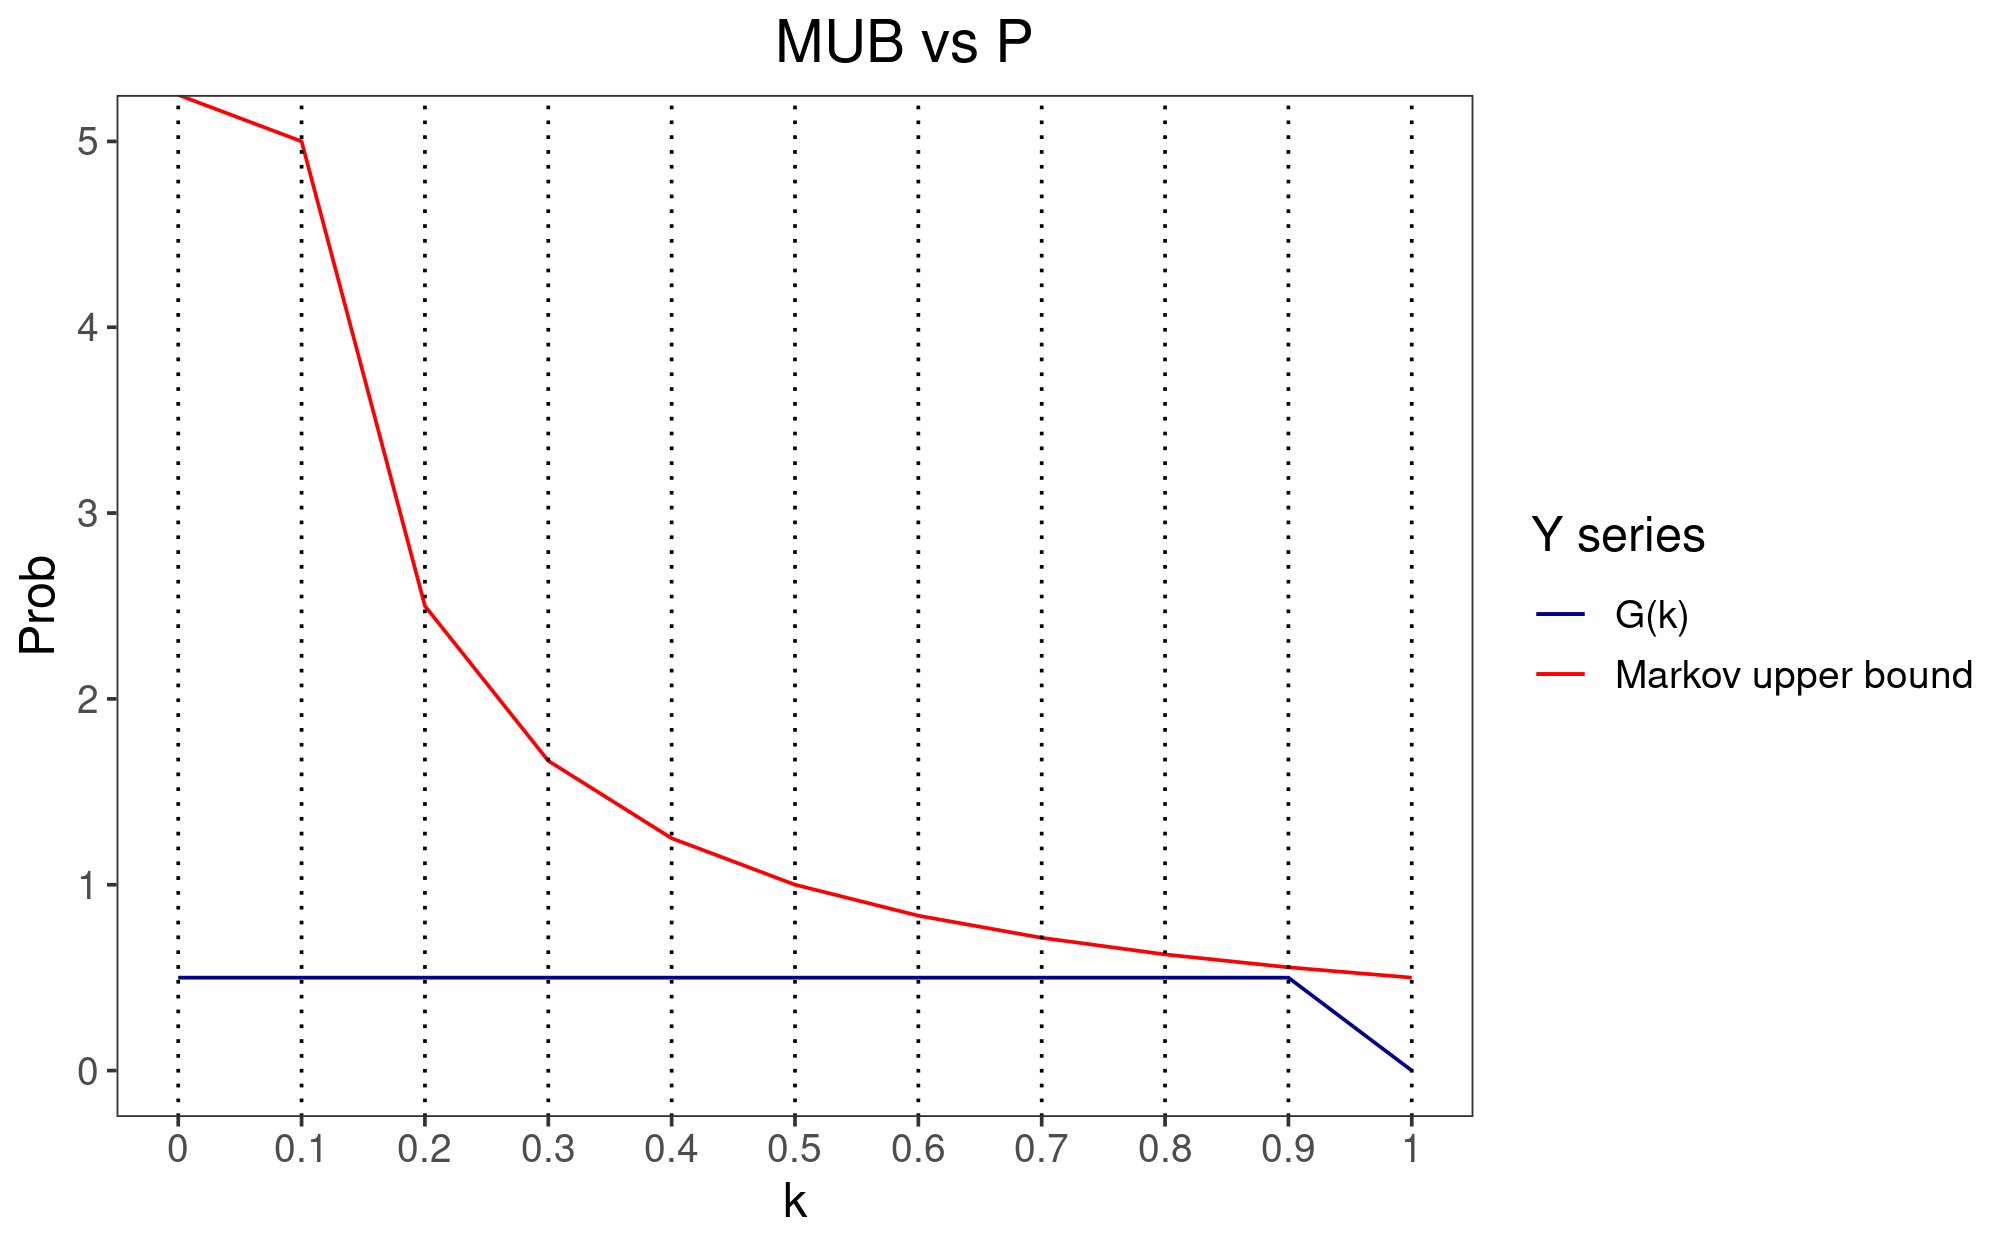

In [133]:
x<-seq(0,1,0.1)
bin <- pbinom(x, size=1, prob=1/2) #F(x)
E_bin <- 1/2*1
Mub_bin <- Mub(E_bin, x)
binl_plot <- ggplot()+
    geom_line(aes(x=x, y=1-bin, color="G(k)")) + 
    geom_line(aes(x=x, y=Mub_bin, color="Markov upper bound")) +
    scale_color_manual(name = "Y series", values = c("G(k)" = "darkblue", "Markov upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=x, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(x), breaks = x)
binl_plot

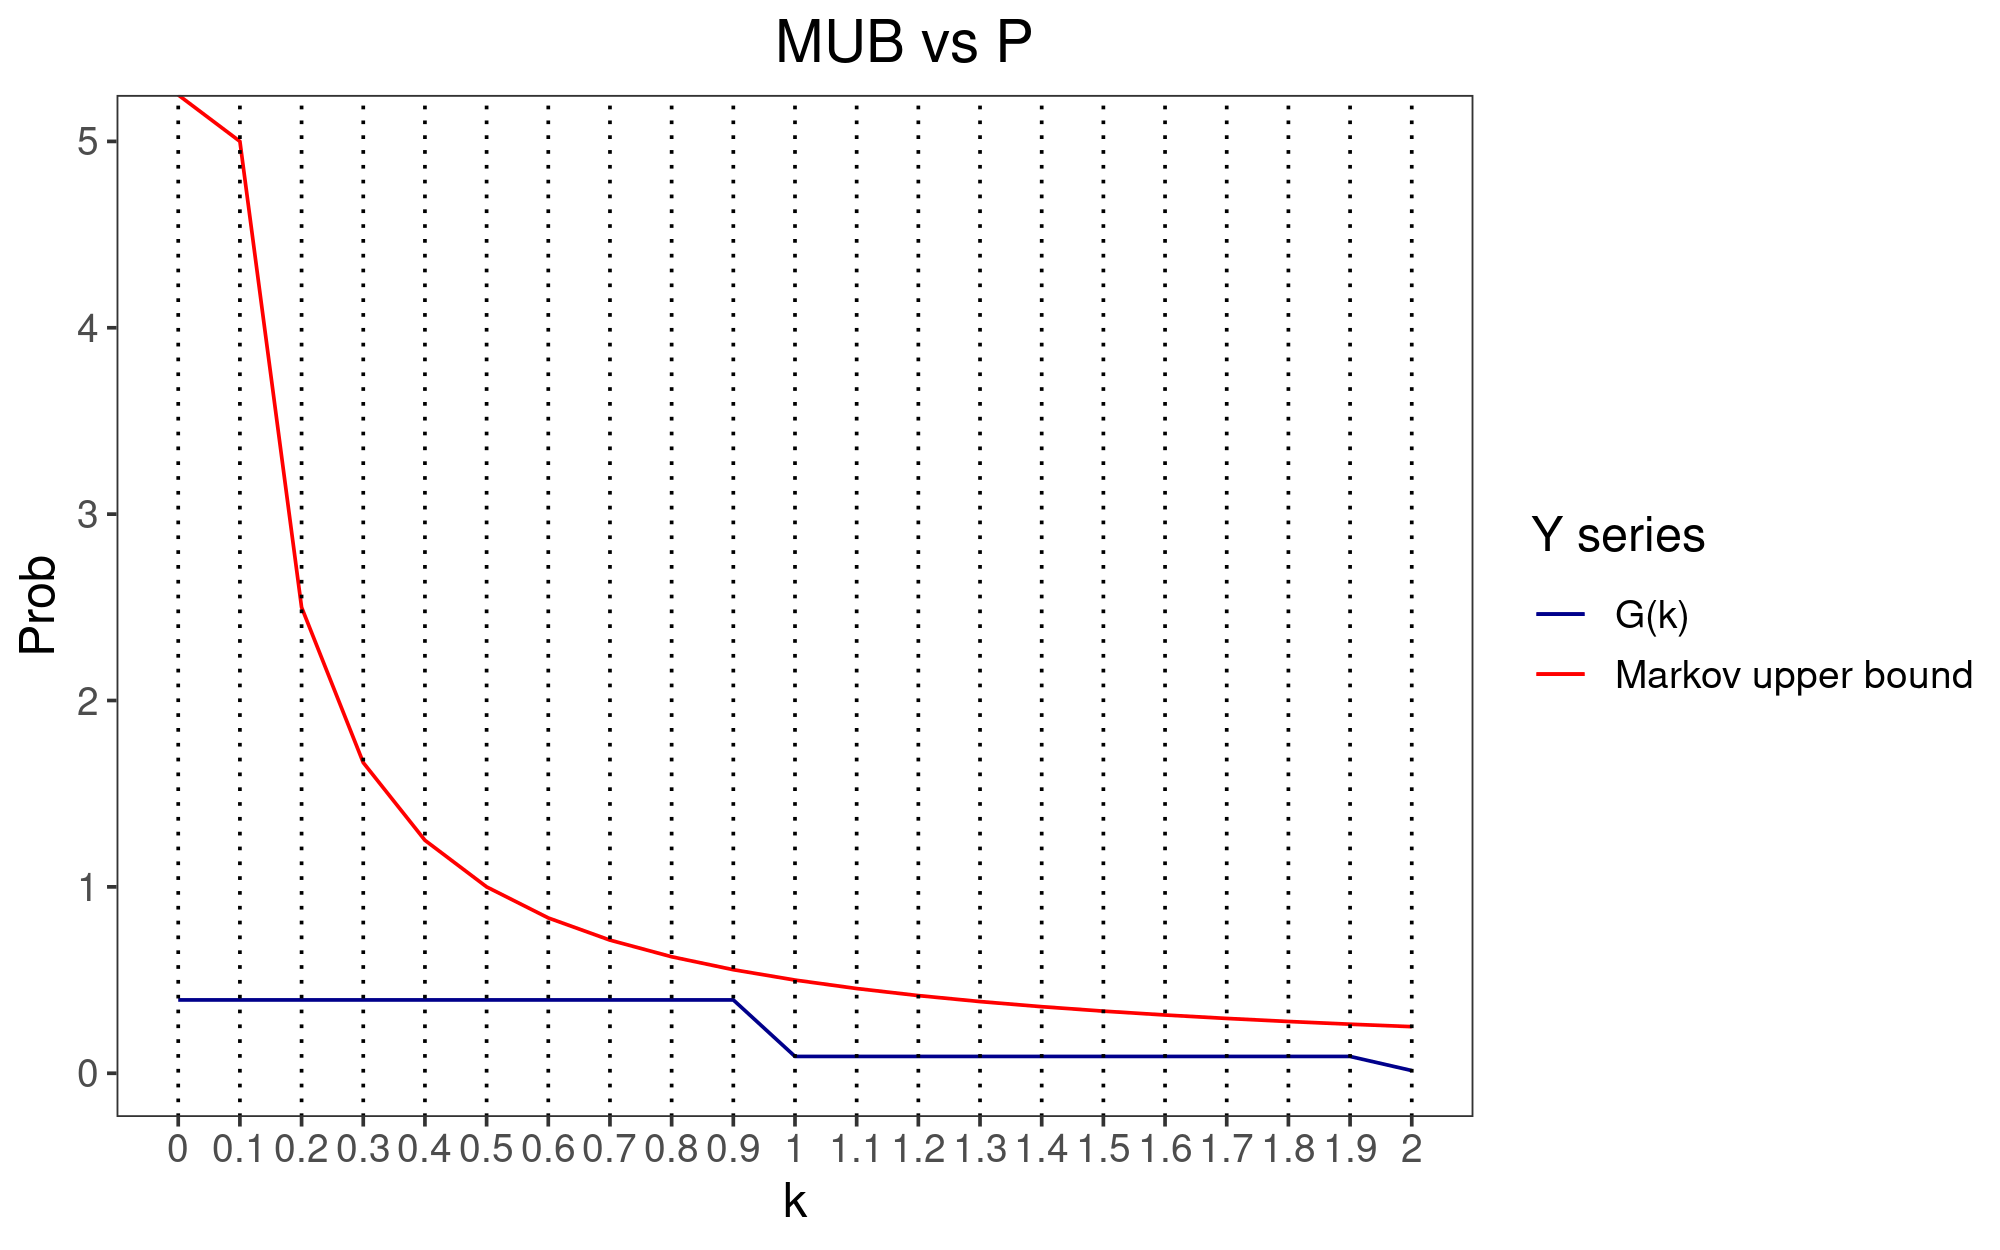

In [142]:
x<-seq(0,2,0.1)
lambda <- 1/2
pois <- ppois(x,lambda) #F(x)
E_pois <- lambda
Mub_pois <- Mub(E_pois, x)
pois_plot <- ggplot()+
    geom_line(aes(x=x, y=1-pois, color="G(k)")) + 
    geom_line(aes(x=x, y=Mub_pois, color="Markov upper bound")) +
    scale_color_manual(name = "Y series", values = c("G(k)" = "darkblue", "Markov upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=x, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(x), breaks = x)
pois_plot

## es3

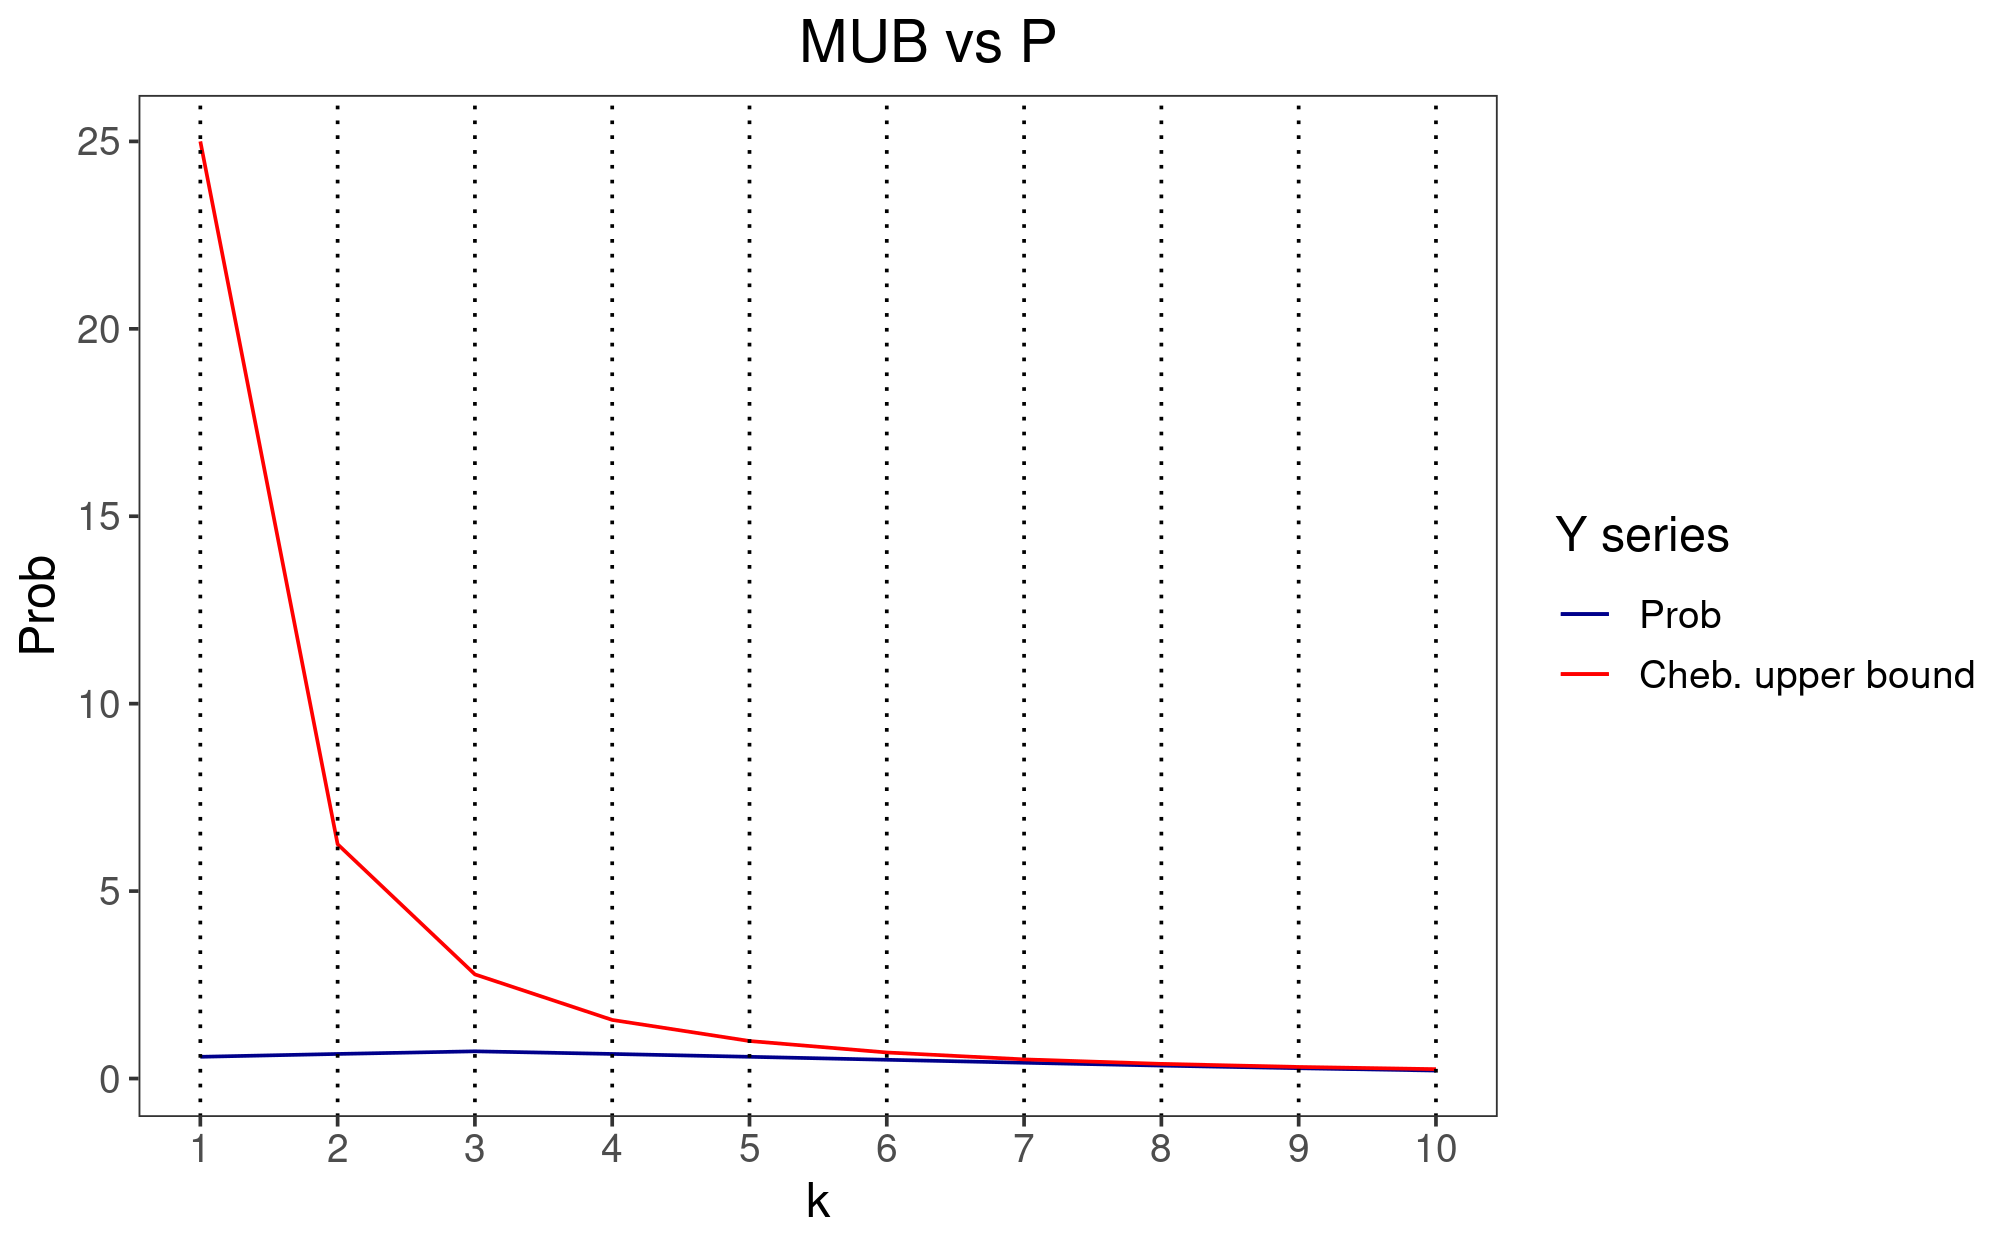

In [151]:
Cub <- function(k, sigma) {
    return(sigma^2 / k^2)
}

k <- 1:10 
mu <- 3
sigma <- 5

gauss <- pnorm( abs(k-mu) , 3, 5)
gauss_cub <- Cub(k, sigma)

gauss_plot <- ggplot()+
    geom_line(aes(x=k, y=1-gauss, color="Prob")) + 
    geom_line(aes(x=k, y=gauss_cub, color="Cheb. upper bound")) +
    scale_color_manual(name = "Y series", values = c("Prob" = "darkblue", "Cheb. upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=k, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(k), breaks = k)
gauss_plot


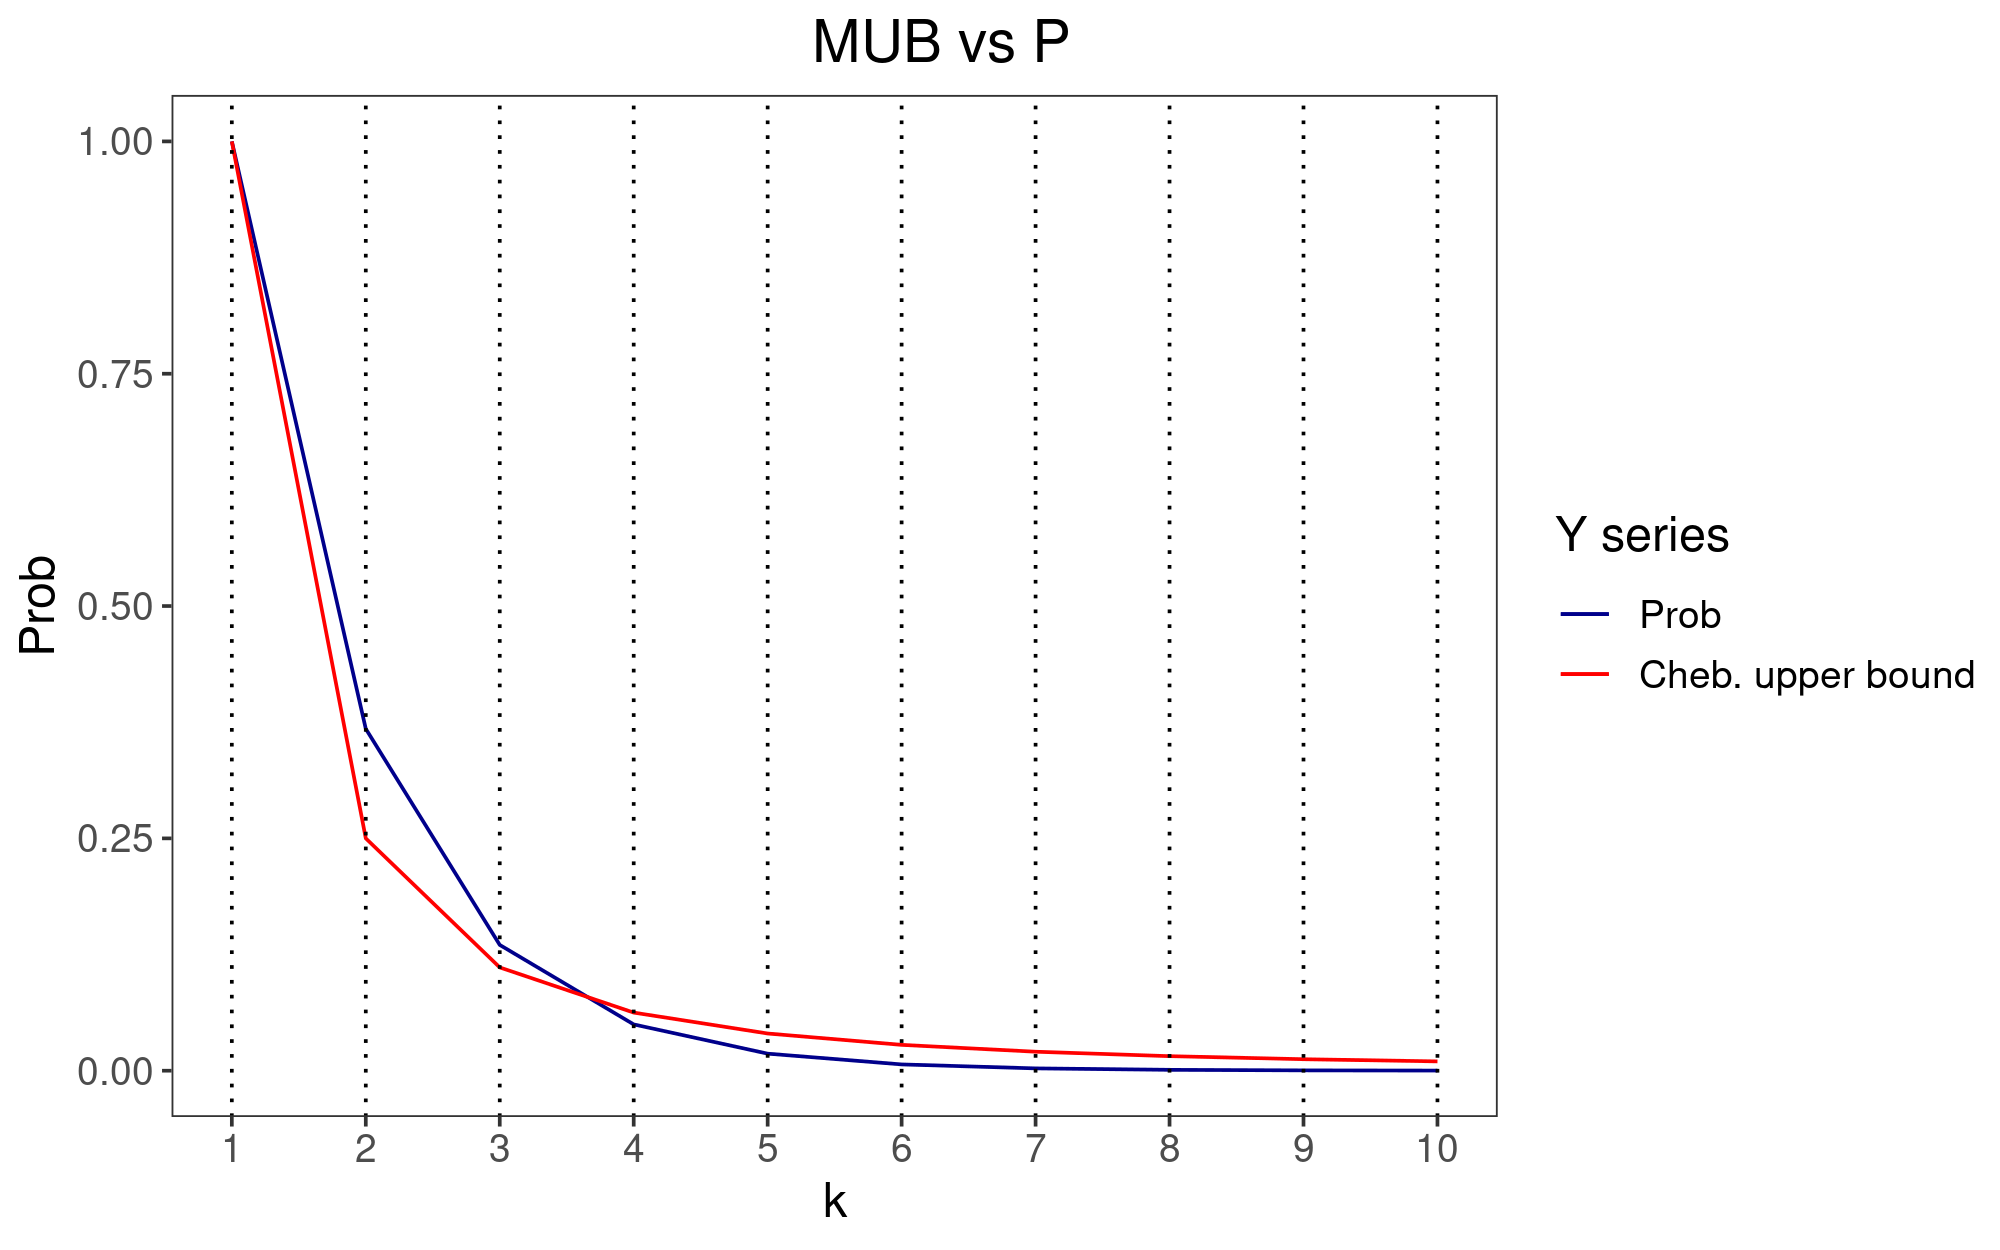

In [154]:
lamda <- 1
mu <- 1/lamda
var <- 1/lamda^2
esp <- pexp( abs(k-mu) ,lamda)
esp_cub <- Cub(k, var)

esp_plot <- ggplot()+
    geom_line(aes(x=k, y=1-esp, color="Prob")) + 
    geom_line(aes(x=k, y=esp_cub, color="Cheb. upper bound")) +
    scale_color_manual(name = "Y series", values = c("Prob" = "darkblue", "Cheb. upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=k, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(k), breaks = k)
esp_plot

[1] 0.5000000 0.1464466 0.5000000 0.8535534 1.0000000 1.0000000

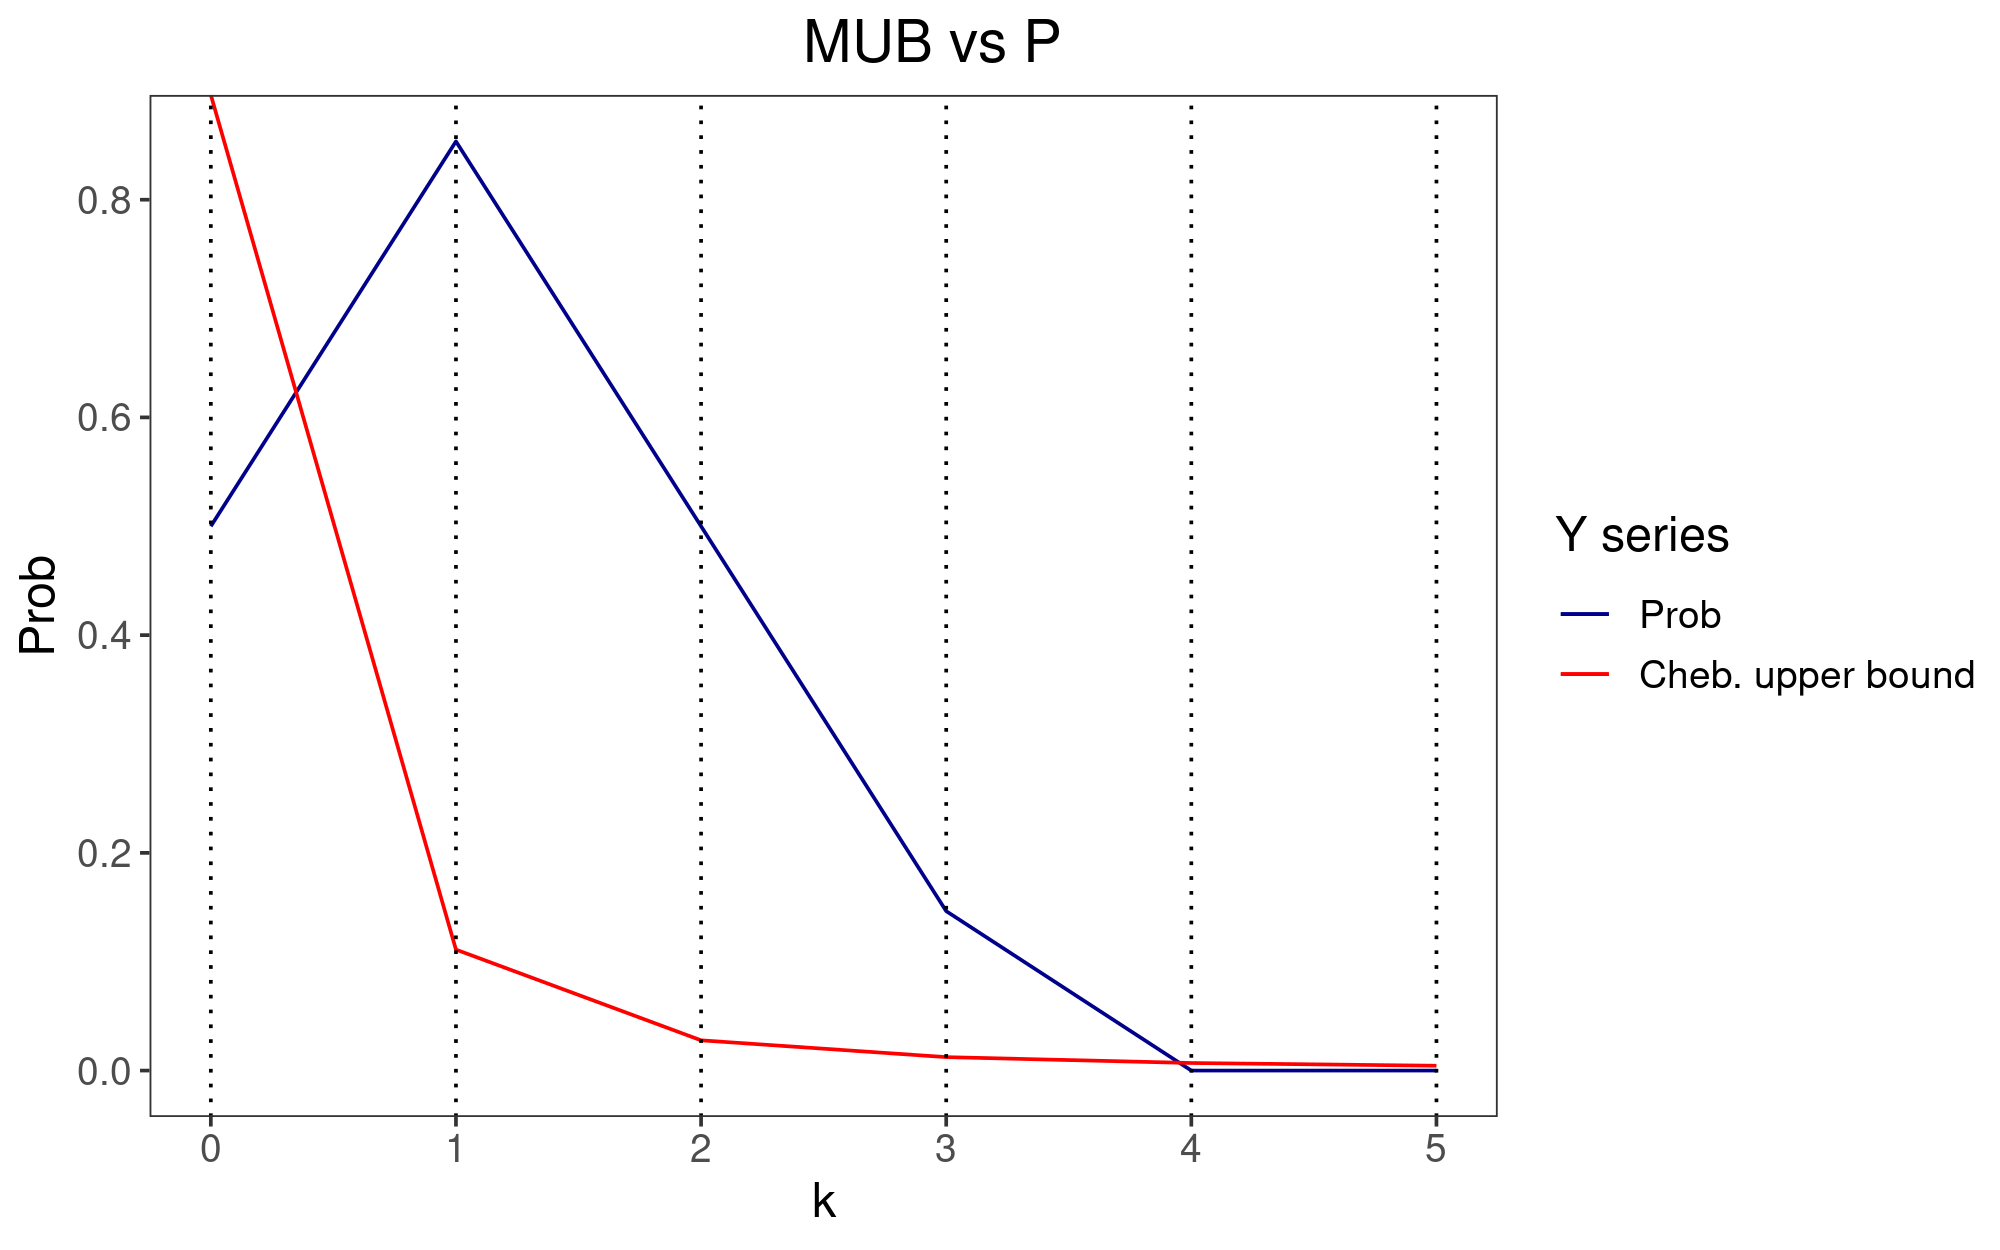

In [162]:
k <- seq(0,5)
min <- 1-sqrt(2)
max <- 1+sqrt(2)
mu <- (min+max)/2
var <- (min+max)^2 /12
unif <- punif( abs(k-mu) ,min,max)
unif_cub <- Cub(k, var)

unif_plot <- ggplot()+
    geom_line(aes(x=k, y=1-unif, color="Prob")) + 
    geom_line(aes(x=k, y=unif_cub, color="Cheb. upper bound")) +
    scale_color_manual(name = "Y series", values = c("Prob" = "darkblue", "Cheb. upper bound" = "red"))+
    theme_bw() +
    labs(title="MUB vs P", x="k",y="Prob")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6),
        panel.background = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
    geom_vline(xintercept=k, linetype="dotted" ) +
    scale_x_continuous(labels = as.character(k), breaks = k)
unif_plot
unif